<a href="https://colab.research.google.com/github/Somaskandan931/PRODIGY_DS_02/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading the Dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/titanic_dataset.csv')

The Titanic dataset contains information about passengers such as age, gender, class, and whether they survived or not. Loading the data into a Pandas DataFrame is the first step, as it allows you to work with the data in a structured format. Pandas is a powerful library for handling tabular data, which is the foundation for cleaning, transforming, and analyzing data.
This step allows us to begin exploring and understanding the dataset. Without this, no further analysis can be performed.

2. Understanding the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


df.info() gives an overview of the dataset, showing the number of non-null entries in each column and their data types.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


df.describe() provides statistical information like mean, standard deviation, and percentiles for numerical columns.

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


df.head() displays the first few rows of the dataset.

3. Handling Missing Data

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


df.isnull().sum() shows how many missing values there are in each column.

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

The code fills missing values in the Age column with the median age. This is because the Age column is numerical and using the median is a reasonable imputation strategy.

In [ ]:
df['Cabin'].fillna('Unknown', inplace=True)

The Cabin column is filled with "Unknown" since the cabin number may not be as critical for survival analysis, and assigning a new category ensures no information is lost.

4. Data Cleaning

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

The Sex column is converted from categorical values ("male", "female") into numerical values (0 for male, 1 for female). This is important because most machine learning algorithms prefer numerical inputs.

In [ ]:
df.drop(['Ticket', 'Name'], axis=1, inplace=True)

Columns like Ticket and Name might not be relevant to predicting survival and can be dropped if you're focusing on other features.

5. Exploratory Data Analysis (EDA)

Survival By gender

<Axes: xlabel='Sex'>

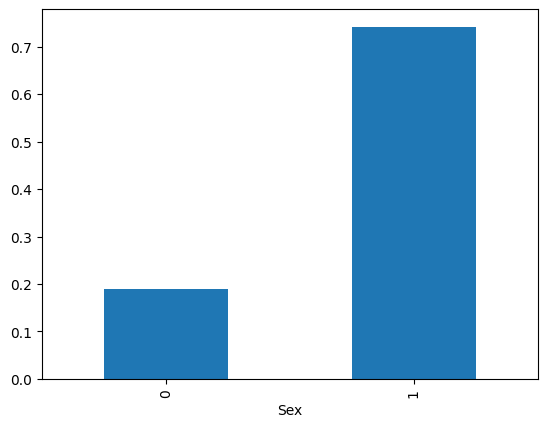

In [ ]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

Survival by Gender: The groupby method groups the data by gender, and then we compute the mean survival rate for each group. This is plotted as a bar chart, which can quickly reveal trends.

Age Distribution:

<Axes: >

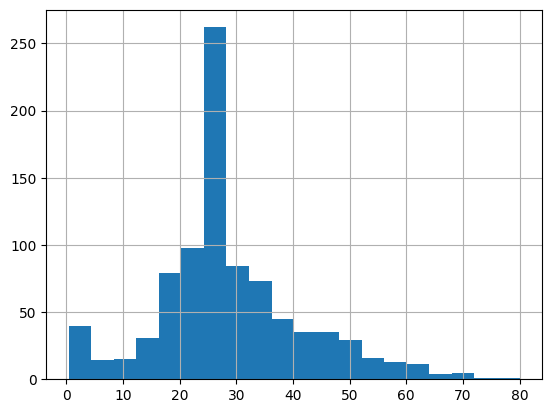

In [ ]:
df['Age'].hist(bins=20)

Age Distribution: The age distribution shows how the passengers' ages were spread across the Titanic. This helps identify any outliers or unusual patterns, such as if there were more children or older passengers.

Survival by Class

<Axes: xlabel='Pclass'>

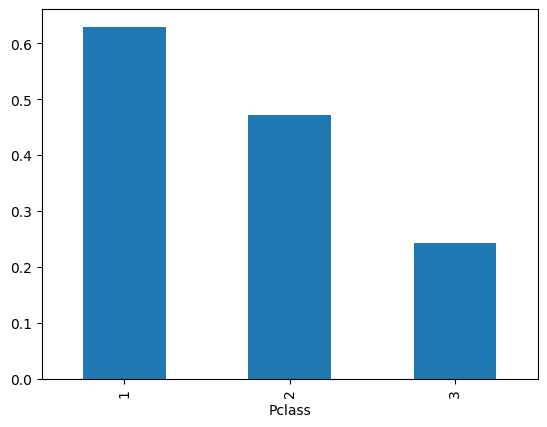

In [ ]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')


Grouping by passenger class (Pclass) and calculating the mean survival rate reveals how much class influenced survival.

6. Feature Engineering

Extracting Title

In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Extracting Title: This code extracts titles like "Mr.", "Mrs.", etc., from the Name column. Titles might reveal social status or age-related information, which could be significant for predicting survival.

Family Size

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

Family Size: Creating a FamilySize feature combines the number of siblings/spouses (SibSp) and parents/children (Parch). Larger families might behave differently in survival situations compared to individuals traveling alone.

Correlation Analysis

In [ ]:
corr = df.corr(numeric_only=True) # Add numeric_only=True to only include numeric columns

df.corr() calculates the correlation matrix for the dataset, showing the relationship between different numerical variables.

<Axes: >

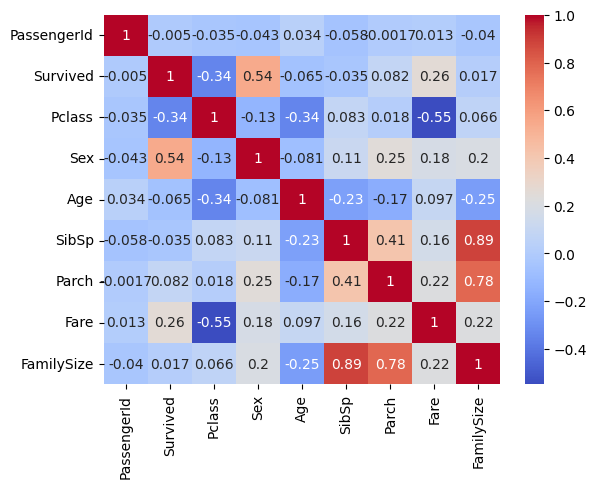

In [ ]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')

A heatmap is used to visualize the correlation matrix. The brighter the color, the stronger the correlation (either positive or negative) between two features.